### Business Uderstanding

Business Problem: How to mengurangi fraud cases dengan memprediksi deteksi awal fraud dalam transaksi?

Objective: Build a model klasidikasi untuk memprediksi probabilitas transaksi adalah fraud.

### Data Cleansing

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv("fraud.csv")

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.shape

(6362620, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
## Check Missing values

In [20]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
## Check outliers

In [24]:
df_num = df.select_dtypes(["int64", "float64"])
col_num = df_num.columns
col_num

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [28]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for step
(102688, 11)
Running for amount
(338078, 11)
Running for oldbalanceOrg
(1112507, 11)
Running for newbalanceOrig
(1053391, 11)
Running for oldbalanceDest
(786135, 11)
Running for newbalanceDest
(738527, 11)
Running for isFraud
(8213, 11)
Running for isFlaggedFraud
(16, 11)


In [30]:
## Check duplicated values

In [32]:
df.duplicated().sum()

0

### EDA

In [35]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [37]:
df = df.drop(columns = ["step", "nameOrig", "nameDest"])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [39]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [43]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [45]:
df = df.drop(columns = ["isFlaggedFraud"])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [47]:
## Univariate Analysis

In [55]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [57]:
## Multivariate Analysis

In [59]:
df_num = df.select_dtypes(["int64","float64"])
col_num = df_num.columns.tolist()
col_num

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

<Axes: >

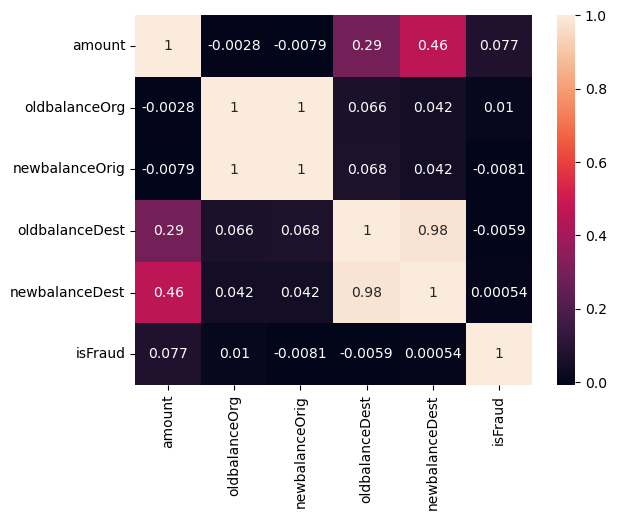

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[col_num].corr(), annot = True)

### Additional Data Preparation before Modeling

In [68]:
df["balance_change_orig"] = df["newbalanceOrig"] - df["oldbalanceOrg"]
df["balance_change_dest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [70]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_change_orig,balance_change_dest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0


In [72]:
## One Hot Encoding

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   type                 object 
 1   amount               float64
 2   oldbalanceOrg        float64
 3   newbalanceOrig       float64
 4   oldbalanceDest       float64
 5   newbalanceDest       float64
 6   isFraud              int64  
 7   balance_change_orig  float64
 8   balance_change_dest  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 436.9+ MB


In [76]:
df = pd.get_dummies(df)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_change_orig,balance_change_dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0,False,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0,False,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0,False,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0,False,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0,False,False,False,True,False


In [78]:
## Train test split

In [80]:
X = df.drop(columns = ["isFraud"])
y = df["isFraud"]

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4453834, 12)
(1908786, 12)
(4453834,)
(1908786,)


### Modeling & Evaluation

In [87]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
params = {
    "max_depth": [2,5,7],
    "min_samples_leaf": [100,200,300]
}

In [91]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 3,
                           scoring = "roc_auc")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7],
                         'min_samples_leaf': [100, 200, 300]},
             scoring='roc_auc')

In [92]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=300)

In [93]:
## Evaluation

In [94]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rfbest = rf_best.predict(X_test)

In [95]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.876418152350081
0.803484602917342
0.6778768233387358


In [98]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.8908566721581549
0.9598257502420136
0.9835390946502057


In [100]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rfbest = rf_best.predict_proba(X_test)[:,1]

In [101]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rfbest))

0.9381395704577363
0.9960403271308849
0.9956521580725827


#### Business Conclusion

Business Impact:

Final Model = Decision Tree

Recall = 87%   Precision = 88%

Assume dari setiap 100 transactions, 5 akan fraud

1. Before the model:
   - Kita tidak tahu transaksi yang akan fraud, sehingga tidak ada upaya mitigasi fraud
   - Fraud cases = 5
   - Loss = 5 * 1M = 5M

2. After the model:
   - Kita dapat mengetahui transaksi yang lebih mungkin menjadi fraud.
   - Fraud cases = 5 - 5 * Recall = 5 - 5 * 0.87 = 5 - 4.35 = 0.65 = 1
   - Loss = 1 * 1M = 1M